**FORECASTING - Seasonal Naive Forecasting**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/passenger.csv")

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date').set_index('Date')


In [4]:
print(df.shape)



(1918, 6)


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2019-07-01 to 2024-09-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Local Route   1918 non-null   int64  
 1   Light Rail    1918 non-null   int64  
 2   Peak Service  1918 non-null   int64  
 3   Rapid Route   1918 non-null   int64  
 4   School        1918 non-null   int64  
 5   Other         1898 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 104.9 KB
None


In [6]:
print(df.isna().sum())


Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


In [7]:
df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-01,15987,9962,407,21223,3715,NaN
2019-07-02,16895,10656,409,21715,3993,NaN
2019-07-03,16613,10658,427,22025,3638,NaN
2019-07-04,16604,10445,437,21868,3576,NaN
2019-07-05,16040,10532,400,20697,2856,NaN


In [21]:
#create total passenger column
service_cols = ['Local Route','Light Rail','Peak Service','Rapid Route','School']
df['Total'] = df[service_cols].sum(axis=1)


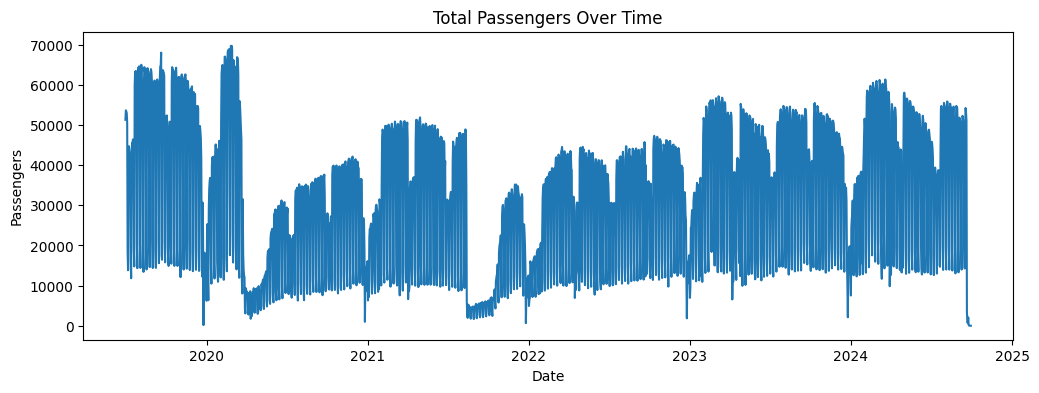

In [9]:
#Plot Total Ridership Over Time (Trend)
plt.figure(figsize=(12,4))
plt.plot(df['Total'])
plt.title("Total Passengers Over Time")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.show()


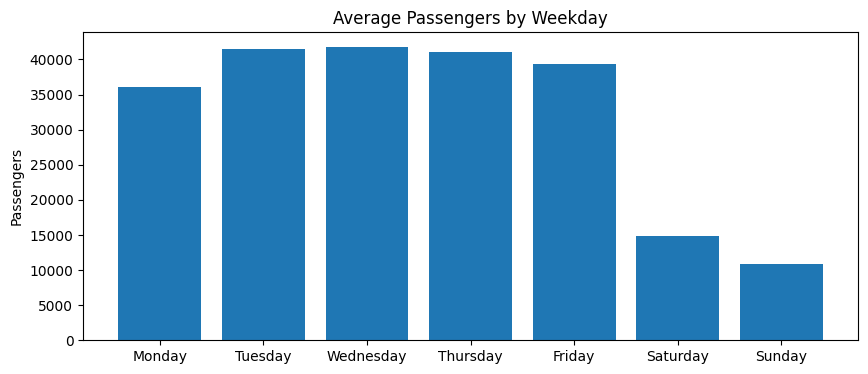

In [10]:
#Weekly Pattern (Seasonality)
df['weekday'] = df.index.day_name()

weekday_avg = df.groupby('weekday')['Total'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

plt.figure(figsize=(10,4))
plt.bar(weekday_avg.index, weekday_avg.values)
plt.title("Average Passengers by Weekday")
plt.ylabel("Passengers")
plt.show()


/tmp/ipython-input-127065383.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Total'].resample('M').mean()


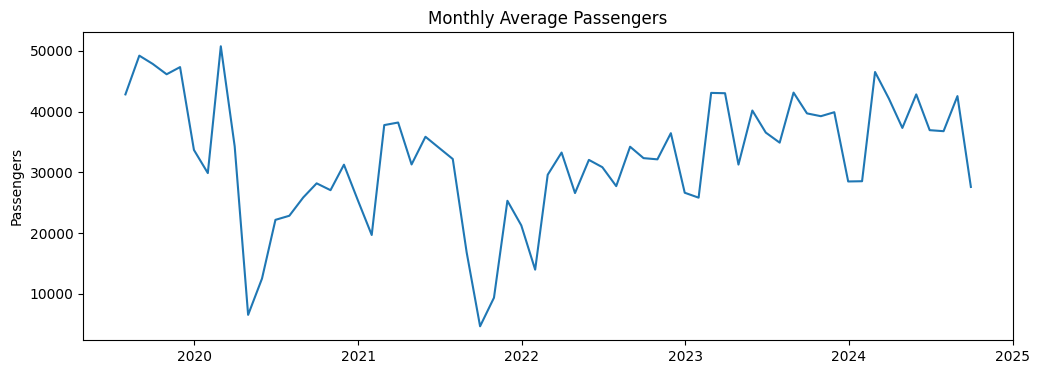

In [11]:
#Monthly Pattern
monthly_avg = df['Total'].resample('M').mean()

plt.figure(figsize=(12,4))
plt.plot(monthly_avg)
plt.title("Monthly Average Passengers")
plt.ylabel("Passengers")
plt.show()


In [12]:
#Missing Date Check
full_range = pd.date_range(df.index.min(), df.index.max(), freq='D')
missing_dates = full_range.difference(df.index)
missing_dates[:10]


DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [14]:
df_daily = df.asfreq('D')


In [15]:
#Handle missing values
df_daily = df_daily.fillna(method='ffill')


/tmp/ipython-input-2953358083.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily = df_daily.fillna(method='ffill')


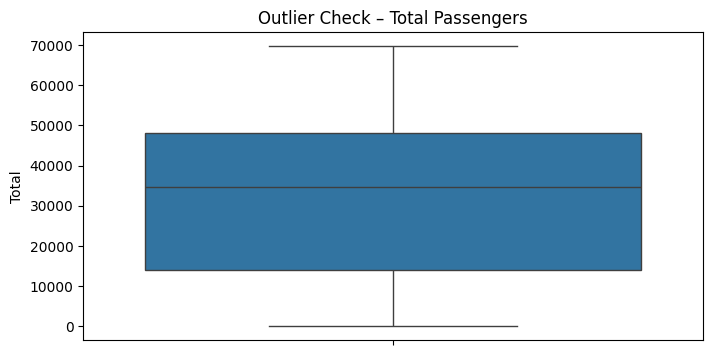

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot(df_daily['Total'])
plt.title("Outlier Check – Total Passengers")
plt.show()


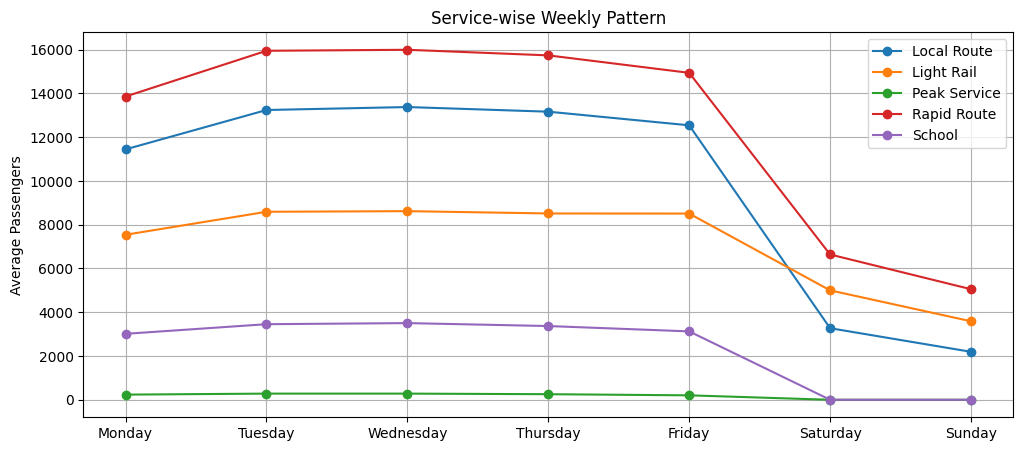

In [17]:
#Service-wise Weekly Pattern
weekday_service = df_daily.groupby(df_daily.index.day_name())[service_cols].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

plt.figure(figsize=(12,5))
for col in service_cols:
    plt.plot(weekday_service.index, weekday_service[col], marker='o', label=col)

plt.title("Service-wise Weekly Pattern")
plt.ylabel("Average Passengers")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
#Forecasting Approach (Seasonal Naive)
h = 7  # forecast horizon
lag = 14  # seasonal lag

future_index = pd.date_range(df_daily.index.max() + pd.Timedelta(days=1),
                             periods=h, freq='D')

forecasts = pd.DataFrame(index=future_index)

for col in service_cols:
    values = []
    for d in future_index:
        past_day = d - pd.Timedelta(days=lag)
        values.append(df_daily[col].loc[past_day])
    forecasts[col] = values

forecasts = forecasts.round(0).astype(int)


In [20]:
print("7-Day Forecast:")
print(forecasts)


7-Day Forecast:
            Local Route  Light Rail  Peak Service  Rapid Route  School
2024-09-30        15520       10326           317        18804    4726
2024-10-01        17080       11374           349        20551    4878
2024-10-02        16776       11300           383        20242    4401
2024-10-03        16129       10469           288        19650    4557
2024-10-04          485        2537             0          440      37
2024-10-05           28         832             0           64       0
2024-10-06           21         577             0           49       0
